In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Here, I am just importing the libraries I will be using

In [8]:

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")
import numpy as np
import descartes 
from shapely.geometry import Point, Polygon

%matplotlib inline

Setup Complete


In [1]:
!pip install geopandas
!pip install descartes
!pip install pysal

In [14]:
import geopandas as gpd
import shapely.geometry 
from shapely.wkt import loads
from shapely.geometry import Point


In [19]:
map = gpd.read_file("/stage3.csv")
map.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,geometry
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,14,,,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,,-79.8559,,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,,,None
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,43,,,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.909,,-118.333,,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62,35,None
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,9,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,Cotton Club,-82.1377,2,,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56,13,None
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,6,,,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,,-104.802,,,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40,28,None
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,6,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.114,,-79.9569,2,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62,27,None


In [21]:
map['latitude']

0         40.3467
1          33.909
2         41.4455
3         39.6518
4          36.114
           ...   
239672           
239673    31.7537
239674    29.9239
239675    29.7201
239676    44.7293
Name: latitude, Length: 239677, dtype: object

In [28]:
map['latitude'] = pd.to_numeric(map['latitude'],errors='coerce')
map['longitude'] = pd.to_numeric(map['longitude'],errors='coerce')



In [29]:
map.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,geometry
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,14,,,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,,-79.8559,,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,,,None
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,43,,,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,,-118.3330,,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62,35,None
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,9,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,Cotton Club,-82.1377,2,,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56,13,None
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,6,,,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,,-104.8020,,,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40,28,None
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,6,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,,-79.9569,2,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62,27,None


In [30]:
gdf =  gpd.GeoDataFrame(
    map, geometry=gpd.points_from_xy(map.longitude, map.latitude))

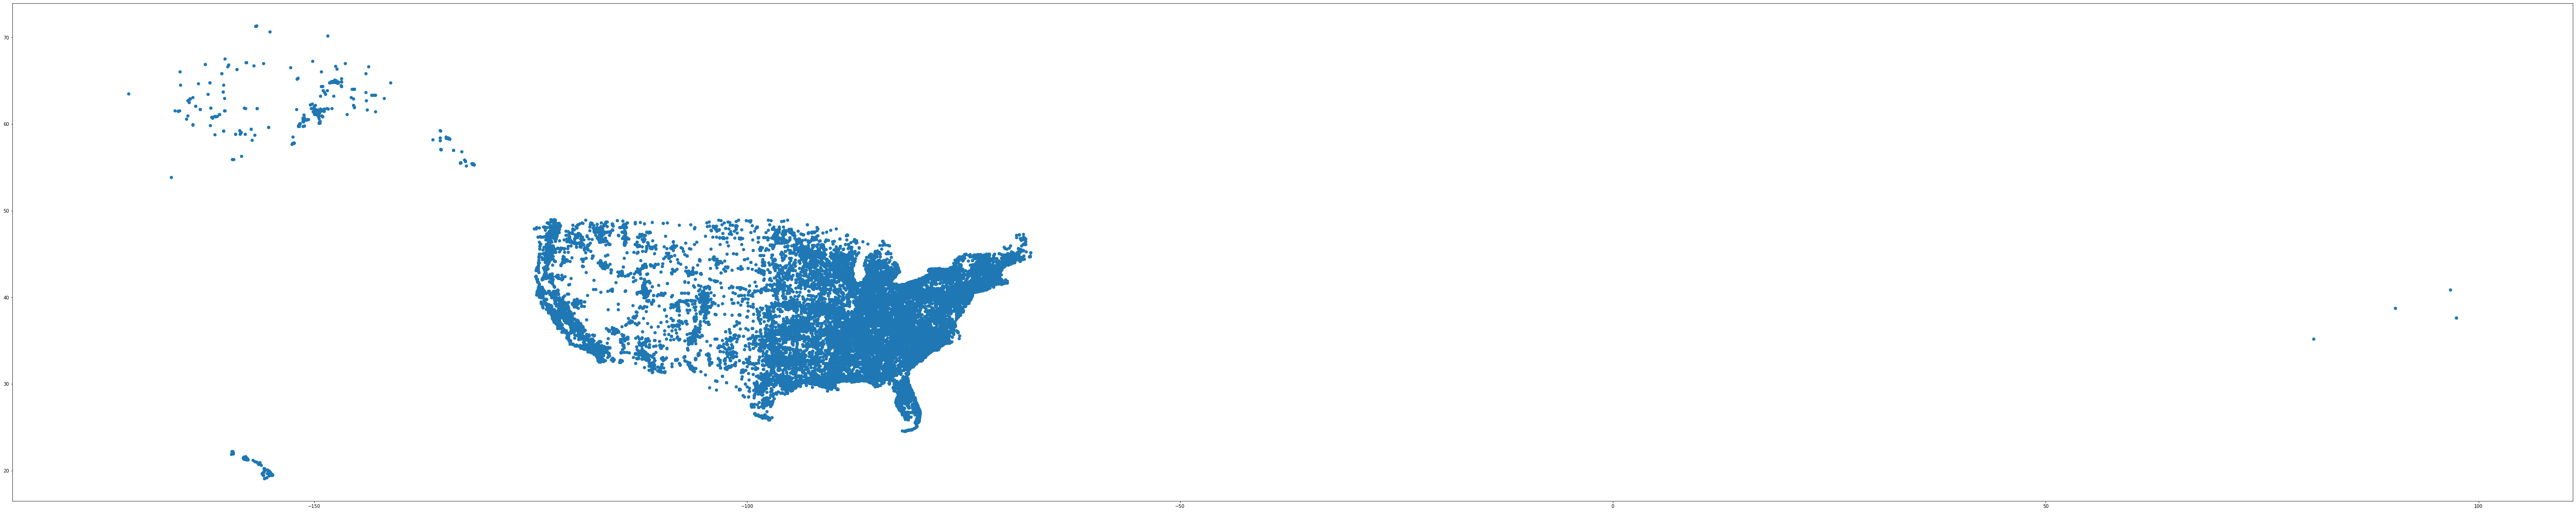

In [45]:
fig,ax = plt.subplots(figsize = (100,100))
map.plot(ax=ax)

# New Section

Text(0.5, 1.0, 'USA 2017 and 1810')

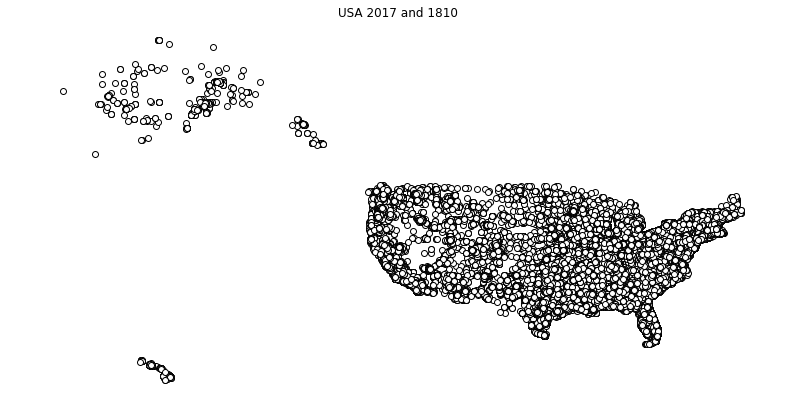

In [41]:
fig, ax = plt.subplots(1, figsize=(14,10))  # Initialize the plot figure (drawing area) and axes (data area)
ax.set_xlim([-180, -60]) # Set the x axis limit on the axes
ax.set_aspect('equal')   # set the aspect ratio for the x and y axes to be equal. 
                         # This is done automatically in gdf.plot()
    
base = usa.plot(ax=ax, color='black')  # Set the base map, or bottom map layer
map.plot(ax=base, color='white', edgecolor="black")  # draw the data with the base
_ = ax.axis('off') # Don't show the x, y axes and labels in the plot
ax.set_title("USA 2017 and 1810")  # Give the plot a title

In [ ]:
x = !ls
print(x)
if str(x).find('geopandas_intro') < 0:
  # Run this once to copy the files from the GITHUB repo to your Google Collab folder
  !git clone https://github.com/dlab-geo/geopandas_intro
else:
  print('You already have the files')

['sample_data']
Cloning into 'geopandas_intro'...
remote: Enumerating objects: 1382, done.
remote: Counting objects: 100% (551/551), done.
remote: Compressing objects: 100% (401/401), done.
remote: Total 1382 (delta 201), reused 470 (delta 135), pack-reused 831
Receiving objects: 100% (1382/1382), 473.25 MiB | 35.82 MiB/s, done.
Resolving deltas: 100% (618/618), done.
Checking out files: 100% (106/106), done.


In [ ]:
my_folder = "./"

In [ ]:
!ls

geopandas_intro  sample_data


In [ ]:
states = geopandas.read_file( "/DATA_01-2013_03-2018.tar.gz")  


DriverError: ignored

Here, I am importing even more libraries. 

In [ ]:


gun_violence = "/DATA_01-2013_03-2018.tar.gz"

df = pd.read_csv(gun_violence)

df.head()




/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stage3.csv,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105.0,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0.0,4.0,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,14.0,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,NaN,-79.8559,NaN,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726.0,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1.0,3.0,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,43.0,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,NaN,-118.3330,NaN,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855.0,2013-01-01,Ohio,Lorain,1776 East 28th Street,1.0,3.0,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,Cotton Club,-82.1377,2.0,NaN,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925.0,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4.0,0.0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,6.0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,NaN,-104.8020,NaN,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959.0,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2.0,2.0,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,NaN,-79.9569,2.0,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


Here, I am importing the data set and setting it to be df


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mounting

In [ ]:
killed_by_state1 = df.groupby("state", as_index=False)["n_killed"].count()
killed_by_state1

,state,n_killed
0,Alabama,5471
1,Alaska,1349
2,Arizona,2328
3,Arkansas,2842
4,California,16306
5,Colorado,3201
6,Connecticut,3067
7,Delaware,1685
8,District of Columbia,3195
9,Florida,15029


Here, I am making a table with all the states by count


In [ ]:
killed_by_state = df.groupby("state", as_index=False)["n_killed"].sum()
killed_by_state

,state,n_killed
0,Alabama,1880.0
1,Alaska,267.0
2,Arizona,1094.0
3,Arkansas,773.0
4,California,5562.0
5,Colorado,796.0
6,Connecticut,341.0
7,Delaware,217.0
8,District of Columbia,459.0
9,Florida,3909.0


Making a table by total deaths per state

Text(0.5, 0, 'Total Number Killed')

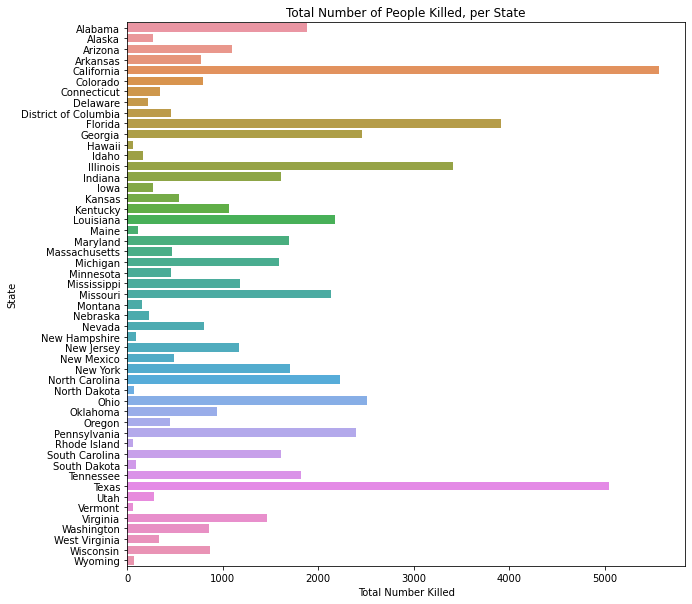

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(10,10))

# Add title
plt.title("Total Number of People Killed, per State")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=killed_by_state["n_killed"], y=killed_by_state["state"])

# Add label for vertical axis
plt.ylabel("State")
plt.xlabel("Total Number Killed")

Making a graph of total deaths per state

In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['month']

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
239673    3.0
239674    3.0
239675    3.0
239676    3.0
239677    NaN
Name: month, Length: 239678, dtype: float64

Adding year and month columns that correspond to numeric values.

In [ ]:
killed_over_time = df.groupby("year", as_index=False)["n_killed"].sum()

killed_over_time

,year,n_killed
0,2013.0,317.0
1,2014.0,12557.0
2,2015.0,13484.0
3,2016.0,15066.0
4,2017.0,15511.0
5,2018.0,3533.0


making a graph of the total number of deaths per year

In [ ]:
df

,stage3.csv,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,year,month
0,461105.0,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0.0,4.0,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,14.0,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,NaN,-79.8559,NaN,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,2013.0,1.0
1,460726.0,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1.0,3.0,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,43.0,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,NaN,-118.3330,NaN,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,2013.0,1.0
2,478855.0,2013-01-01,Ohio,Lorain,1776 East 28th Street,1.0,3.0,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,Cotton Club,-82.1377,2.0,NaN,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,2013.0,1.0
3,478925.0,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4.0,0.0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,6.0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,NaN,-104.8020,NaN,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,2013.0,1.0
4,478959.0,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2.0,2.0,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,NaN,-79.9569,2.0,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,2013.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239673,1083139.0,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1.0,0.0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,4.0,0::Unknown,0::Unknown,"Shot - Dead (murder, accidental, suici

Text(0, 0.5, 'Number of Total d')

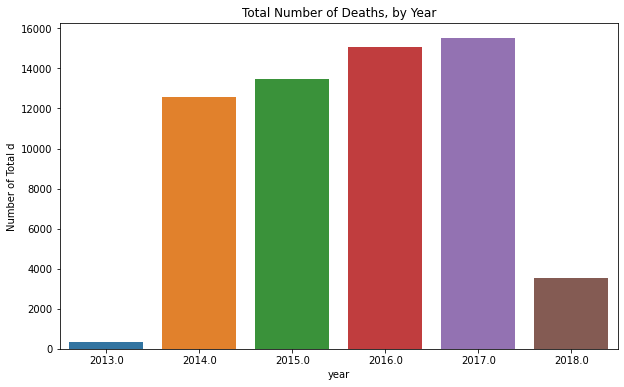

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Total Number of Deaths, by Year")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x= killed_over_time['year'], y= killed_over_time['n_killed'])

# Add label for vertical axis
plt.ylabel("Number of Total d")


Graphing total deaths per year, over time

Text(0.5, 41.09375, 'Airline')

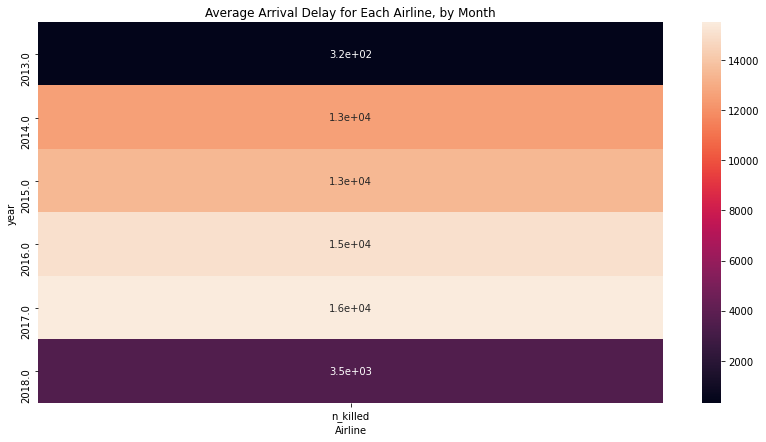

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Average Arrival Delay for Each Airline, by Month")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=killed_over_time, annot=True)

# Add label for horizontal axis
plt.xlabel("Airline")

Tried to make a heatmap but it didn't work out

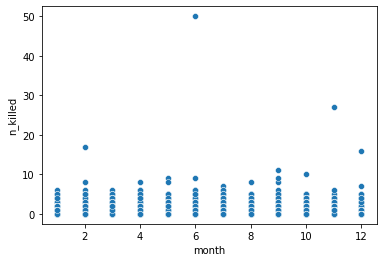

In [ ]:
sns.scatterplot(x=df['month'], y=df['n_killed'])


scatterplot of total people killed per month

In [ ]:
df['n_injured'].mean()

0.4940065171042695

In [ ]:
killed_by_month = df.groupby("month", as_index=False)["n_injured"].mean()

killed_by_month

,month,n_injured
0,1.0,0.474038
1,2.0,0.446898
2,3.0,0.462677
3,4.0,0.478151
4,5.0,0.513999
5,6.0,0.522367
6,7.0,0.532945
7,8.0,0.513736
8,9.0,0.496846
9,10.0,0.490498


Grouping to show a average injuries per month

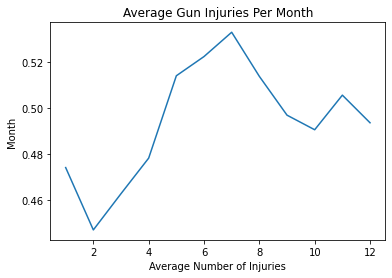

In [ ]:
plt.plot(killed_by_month['month'],killed_by_month['n_injured'])
plt.title('Average Gun Injuries Per Month')
plt.xlabel('Average Number of Injuries')
plt.ylabel('Month')
plt.show()

making a visualization of total number of injuries over time. 